In [8]:
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [9]:
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [10]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 200), (25000,), (25000, 200), (25000,))

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.6798 - loss: 0.5505 - val_accuracy: 0.8532 - val_loss: 0.3395
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9697 - loss: 0.0995 - val_accuracy: 0.8451 - val_loss: 0.4061
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9981 - loss: 0.0120 - val_accuracy: 0.8468 - val_loss: 0.4937
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8553 - val_loss: 0.5014
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 1.0000 - loss: 4.7600e-04 - val_accuracy: 0.8568 - val_loss: 0.5210


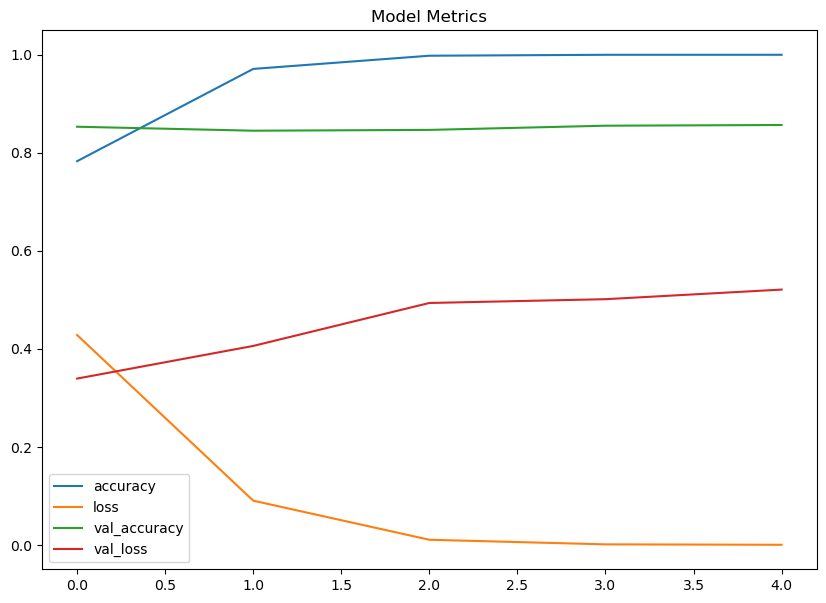

In [17]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Model Metrics")
plt.show()

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8529 - loss: 0.5295
Test Accuracy: 0.8567600250244141


In [19]:
y_pred = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [16]:
y_pred

array([[4.4813273e-03],
       [9.9999833e-01],
       [3.5806501e-01],
       ...,
       [7.6598744e-03],
       [7.7849359e-04],
       [9.3456751e-01]], dtype=float32)

In [17]:
y_pred = y_pred.flatten()

In [19]:
y_pred

array([4.4813273e-03, 9.9999833e-01, 3.5806501e-01, ..., 7.6598744e-03,
       7.7849359e-04, 9.3456751e-01], dtype=float32)

In [20]:
y_pred = (y_pred > 0.5).astype(int)

In [21]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



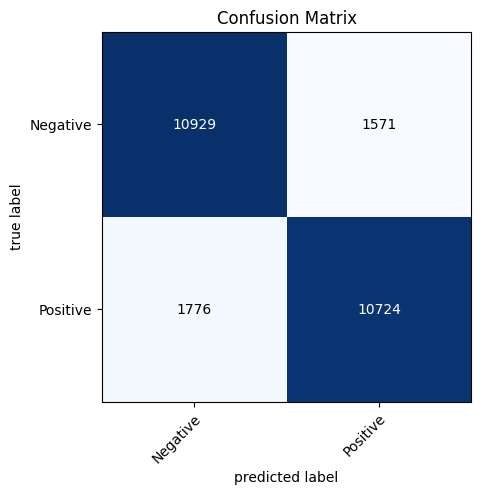

In [22]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.show()